In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon, pearsonr
from sklearn.metrics import roc_auc_score, r2_score
import os
from os.path import join
import pandas as pd
import seaborn as sns


CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('CCB_plot_style_0v4.mplstyle');
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution


C:\Users\alexk\projects\DLkcat_Matters_Arising\code


Loading results from DLkcat paper

In [2]:
data_test_DLkcat = pd.read_pickle(join( "..", "data", "DLkcat", "df_pred.pkl"))
data_test_DLkcat.head()

,y_true,y_pred,Sequence,max_ident,sim_pred_3,sim_pred_1
0,-2.207608,-0.071899,MSAIDCIITAAGLSSRMGQWKMMLPWEQGTILDTSIKNALQFCSRI...,22.8,-1.486273,-2.275724
1,-3.657577,-2.707640,MKEFYLTVEQIGDSIFERYIDSNGRERTREVEYKPSLFAHCPESQA...,100.0,-2.369079,-2.221849
2,0.949390,0.831021,MSPSKMNATVGSTSEVEQKIRQELALSDEVTTIRRNAPAAVLYEDG...,100.0,0.455934,1.230449
3,1.672098,1.513026,MKNVGFIGWRGMVGSVLMQRMVEERDFDAIRPVFFSTSQLGQAAPS...,100.0,1.045579,1.672098
4,-1.790485,-2.830310,MATSTETISSLAQPFVHLENPINSPLVKETIRPRNDTTITPPPTQW...,99.4,-1.733113,0.995635


In [3]:
data_valid_DLkcat = pd.read_pickle(join("..", "data", "DLkcat", "df_validation.pkl"))
data_valid_DLkcat.head()

,y_true,Sequence
0,-1.029963,MESAIDTHLKCPRTLSRRVPEEYQPPFPMWVARADEQLQQVVMGYL...
1,-0.853872,MLKIFNTLTRQKEEFKPIHAGEVGMYVCGITVYDLCHIGHGRTFVA...
2,-1.273001,MSSKLHCVKLNDGHFIPALGFGTYKPKEVPKSKSLEAAHLAIDVGY...
3,0.213075,MALSAIGFEGYEKRLEVTFFEPSIFQDSKGLGLRALTKSQLDEILT...
4,2.992995,MGFTKKSLDQIDVKDKRVFMRVDFNVPMEKGKITNTKRIDATIPSI...


In [4]:
help_df =data_test_DLkcat

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["sim_pred_3"])
abs_error_sim = abs(y_true - y_pred)
R2_sim =  r2_score(y_true, y_pred)
print(R2_sim)

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["y_pred"])
abs_error = abs(y_true - y_pred)
R2 =  r2_score(y_true, y_pred)
print(R2)

d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='less')
print(p)

0.42000166391555804
0.44447253110852536
4.907609076934498e-05


In [5]:
d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='two-sided')
print(p)

9.815218153868996e-05


##### (b)(ii) Plotting performances for different sequence identities:

In [6]:
data_test = data_test_DLkcat
data_test["sim_pred"] = data_test["sim_pred_3"]

In [7]:
df = pd.DataFrame({"kcat_true" : data_test_DLkcat["y_true"], 
                  "kcat_predicted(DLKcat)" : data_test_DLkcat["y_pred"],
                   "kcat_predicted(mean-approach[3])" : data_test_DLkcat["sim_pred"],
                   "kcat_predicted(mean-approach[1])" : data_test_DLkcat["sim_pred_1"],
                  "Sequence identity" : data_test_DLkcat["max_ident"]})

In [8]:
df_enz_type = pd.read_csv(join( "..", "data", "DLkcat", "test_out.tsv"), sep ="\t")

df["enzyme type"] = df_enz_type["Enzyme_type"]

In [9]:
df.to_csv( join( "..", "data", "DLkcat", "figure_data", "test_data_DLKcat.csv"), index=False)

In [10]:
data_valid_DLkcat["log10_kcat"] = np.round(data_valid_DLkcat["y_true"],4)

data_test_DLkcat["log10_kcat"] = np.round(data_test_DLkcat["y_true"],4)
data_test_DLkcat.head()

,y_true,y_pred,Sequence,max_ident,sim_pred_3,sim_pred_1,sim_pred,log10_kcat
0,-2.207608,-0.071899,MSAIDCIITAAGLSSRMGQWKMMLPWEQGTILDTSIKNALQFCSRI...,22.8,-1.486273,-2.275724,-1.486273,-2.2076
1,-3.657577,-2.707640,MKEFYLTVEQIGDSIFERYIDSNGRERTREVEYKPSLFAHCPESQA...,100.0,-2.369079,-2.221849,-2.369079,-3.6576
2,0.949390,0.831021,MSPSKMNATVGSTSEVEQKIRQELALSDEVTTIRRNAPAAVLYEDG...,100.0,0.455934,1.230449,0.455934,0.9494
3,1.672098,1.513026,MKNVGFIGWRGMVGSVLMQRMVEERDFDAIRPVFFSTSQLGQAAPS...,100.0,1.045579,1.672098,1.045579,1.6721
4,-1.790485,-2.830310,MATSTETISSLAQPFVHLENPINSPLVKETIRPRNDTTITPPPTQW...,99.4,-1.733113,0.995635,-1.733113,-1.7905


In [11]:
df_3c = pd.read_csv(join( "..", "data", "DLkcat", "figure_data", "figure3c.csv"), sep =";")

sub_names = list(set(df_3c["Substrate name"]))
for sub in sub_names:
    help_df = df_3c.loc[df_3c["Substrate name"] == sub]
    y_pred, y_true = help_df["Predicted value (log10 scale)"], help_df["Experimental value (log10 scale)"]
    print(sub, stats.pearsonr(y_true, y_pred)[0])

L-Aspartate 0.5762686065852022
Glycerate 3-phosphate 0.596569315767481
7,8-Dihydrofolate 0.9202762763100331
Penicillin G 0.6935281896676339
Inosine 0.866184704407117
Isopentenyl diphosphate 0.7783108026460629


In [12]:
df_3d = pd.read_csv(join( "..", "data", "DLkcat", "figure_data", "figure3d.csv"), sep =";")

sub_names = list(set(df_3d["Substrate name"]))
for sub in sub_names:
    help_df = df_3d.loc[df_3d["Substrate name"] == sub]
    y_pred, y_true = help_df["Predicted value (log10 scale)"], help_df["Experimental value (log10 scale)"]
    print(sub, stats.pearsonr(y_true, y_pred)[0])

L-Aspartate 0.5762686065852022
Glycerate 3-phosphate 0.596569315767481
7,8-Dihydrofolate 0.9112926364864379
Penicillin G 0.8388768284932409
Inosine 0.866184704407117
Isopentenyl diphosphate 0.8008908546724548


In [13]:
df_all_kcat = pd.read_json(join( "..", "data", "DLkcat", 'Kcat_combination_0918.json'))
df_all_kcat.head()

,ECNumber,Organism,Smiles,Substrate,Sequence,Value,Unit
0,4.2.3.4,Actinidia chinensis,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,20.1000,s^(-1)
1,4.2.3.4,Aspergillus nidulans,C(C(C(C(COP(=O)([O-])[O-])O)O)O)C(=O)C(=O)[O-],3-deoxy-D-arabino-heptulosonate 7-phosphate,MSNPTKISILGRESIIADFGLWRNYVAKDLISDCSSTTYVLVTDTN...,6.8000,s^(-1)
2,4.2.3.4,Neurospora crassa,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAEPISNPTRINILGKDNIIIDHGIWLNFVAQDLLQNIKSSTYILI...,19.0000,s^(-1)
3,2.1.1.255,Streptomyces coelicolor,C[S+](CCC(C(=O)[O-])N)CC1C(C(C(O1)N2C=NC3=C(N=...,S-Adenosyl-L-methionine,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,0.0075,s^(-1)
4,2.1.1.255,Streptomyces coelicolor,CC(=CCCC(=C(C)COP(=O)(O)OP(=O)(O)O)C)C,(E)-2-Methylgeranyl diphosphate,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,0.0390,s^(-1)


In [14]:
df_3c["Value"]  = np.round(10**df_3c["Experimental value (log10 scale)"], 4)
df_all_kcat["Value"] = np.round(df_all_kcat["Value"] ,4)
df_3c["Sequence"] = np.nan
for ind in df_3c.index:
    ec, sub, value = df_3c["EC number"][ind], df_3c["Substrate name"][ind], df_3c["Value"][ind]
    help_df = df_all_kcat.loc[df_all_kcat["ECNumber"] == ec].loc[df_all_kcat["Substrate"] == sub].loc[df_all_kcat["Value"] == value]
    seq = list(help_df["Sequence"])[0]
    df_3c["Sequence"][ind] = seq
    

In [15]:
df_3c["split"] = np.nan
df_3c["Identity"] = np.nan
for ind in df_3c.index:
    seq, kcat = df_3c["Sequence"][ind], np.round(df_3c["Experimental value (log10 scale)"][ind],4)
    help_df = data_test_DLkcat.loc[data_test_DLkcat["Sequence"] == seq].loc[data_test_DLkcat["log10_kcat"] == kcat]
    help_df2 = data_valid_DLkcat.loc[data_valid_DLkcat["Sequence"] == seq].loc[data_valid_DLkcat["log10_kcat"] == kcat]
    if len(help_df) == 0 and len(help_df2) == 0:
        df_3c["split"][ind] = "train"
        df_3c["Identity"][ind] = 100
    elif len(help_df) >0:
        df_3c["split"][ind] = "test"
        df_3c["Identity"][ind] = list(help_df["max_ident"])[0]
    elif len(help_df2) >0:
        df_3c["split"][ind] = "validation"
        df_3c["Identity"][ind] = np.nan

In [16]:
len(df_3c.loc[df_3c["split"] == "validation"])/len(df_3c)

0.125

In [17]:
len(df_3c.loc[df_3c["split"] == "test"])/len(df_3c)

0.15625

In [18]:
len(df_3c.loc[df_3c["split"] == "train"])/len(df_3c)

0.71875

In [19]:
df_3c["split"] = np.nan
df_3c["Identity"] = np.nan
for ind in df_3c.index:
    seq, kcat = df_3c["Sequence"][ind], np.round(df_3c["Experimental value (log10 scale)"][ind],4)
    help_df = data_test_DLkcat.loc[data_test_DLkcat["Sequence"] == seq].loc[data_test_DLkcat["log10_kcat"] == kcat]
    if len(help_df) == 0:
        df_3c["split"][ind] = "train"
        df_3c["Identity"][ind] = 100
    else:
        df_3c["split"][ind] = "test"
        df_3c["Identity"][ind] = list(help_df["max_ident"])[0]

df_3c.to_csv(join( "..", "data", "DLkcat", "figure_data", "figure3c_additional_information.csv"), index=False)

In [20]:
df_3d["Value"]  = np.round(10**df_3d["Experimental value (log10 scale)"], 4)
df_all_kcat["Value"] = np.round(df_all_kcat["Value"] ,4)
df_3d["Sequence"] = np.nan
for ind in df_3d.index:
    sub, value =  df_3d["Substrate name"][ind], df_3d["Value"][ind]
    help_df = df_all_kcat.loc[df_all_kcat["Substrate"] == sub].loc[df_all_kcat["Value"] == value]
    seq = list(help_df["Sequence"])[0]
    df_3d["Sequence"][ind] = seq
    
    
df_3d["split"] = np.nan
df_3d["Identity"] = np.nan
for ind in df_3d.index:
    seq, kcat = df_3d["Sequence"][ind], np.round(df_3d["Experimental value (log10 scale)"][ind],4)
    help_df = data_test_DLkcat.loc[data_test_DLkcat["Sequence"] == seq].loc[data_test_DLkcat["log10_kcat"] == kcat]
    if len(help_df) == 0:
        df_3d["split"][ind] = "train"
        df_3d["Identity"][ind] = 100
    else:
        df_3d["split"][ind] = "test"
        df_3d["Identity"][ind] = list(help_df["max_ident"])[0]

df_3d.to_csv(join( "..", "data", "DLkcat", "figure_data", "figure3d_additional_information.csv"), index=False)

In [21]:
min(df_3d["Identity"])

99.4

Data Analysis:

In [22]:
def R2(y, y_hat):
    y_bar = y.mean()
    RSS = ((y-y_hat)**2).sum()
    TSS = ((y-y_bar)**2).sum()
    return 1 - RSS/TSS

# read data:
df = pd.read_csv(join("..", "data", "DLkcat", "figure_data", "test_data_DLKcat.csv"))
print(df[df["Sequence identity"] == 100].shape[0] / df.shape[0])  # 67.87% of data is 100% identical
print(df[(df["Sequence identity"] < 100) & (df["Sequence identity"] >= 99)].shape[0] / df.shape[0])   # 23.34% of data is >=99%, but <100% identical

0.6787410926365796
0.2333729216152019


In [23]:
# total R2:
y = df["kcat_true"]
y_hat = df["kcat_predicted(DLKcat)"]
print("Coefficient of determination DLKcat = ", R2(y, y_hat))  # 0.4445
y_hat = df["kcat_predicted(mean-approach[3])"]
print("Coefficient of determination mean approach = ", R2(y, y_hat))  # 0.4524

Coefficient of determination DLKcat =  0.44447253110852536
Coefficient of determination mean approach =  0.42000166391555804


In [24]:
# calculate R2 for test data with 100% sequence.identity for Fig. 1:
df_100 = df[df["Sequence identity"] == 100]
R2_DLKcat_100 = R2(df_100["kcat_true"], df_100["kcat_predicted(DLKcat)"]) # 0.547
R2_mean3_100 = R2(df_100["kcat_true"], df_100["kcat_predicted(mean-approach[3])"])   # 0.533
print(R2_DLKcat_100, R2_mean3_100)

0.5467151929619298 0.5011085255451959


In [25]:
# calculate R2 in sliding windows for Fig. 1: 
win = 100 # window size
df_sort = df.sort_values("Sequence identity", ascending=False) # sort by increasing sequence.identity
df_sort_99 = df_sort[df_sort["Sequence identity"] < 100] # exclude sequences that are 100% identical to training data
R2_slide =  pd.DataFrame(columns=["meanID", "R2.DLKcat", "R2.mean3"])
for i in range(df_sort_99.shape[0] - win + 1):
    df_i = df_sort_99.iloc[i:(i+win-1)]
    R2_slide.loc[i, "meanID"] = df_i["Sequence identity"].mean()
    R2_slide.loc[i, "R2.DLKcat"] = R2(df_i["kcat_true"], df_i["kcat_predicted(DLKcat)"])
    R2_slide.loc[i, "R2.mean3"] = R2(df_i["kcat_true"], df_i["kcat_predicted(mean-approach[3])"])

In [26]:
R2_mean3_100

0.5011085255451959

In [27]:
R2_mean3_100

0.5011085255451959

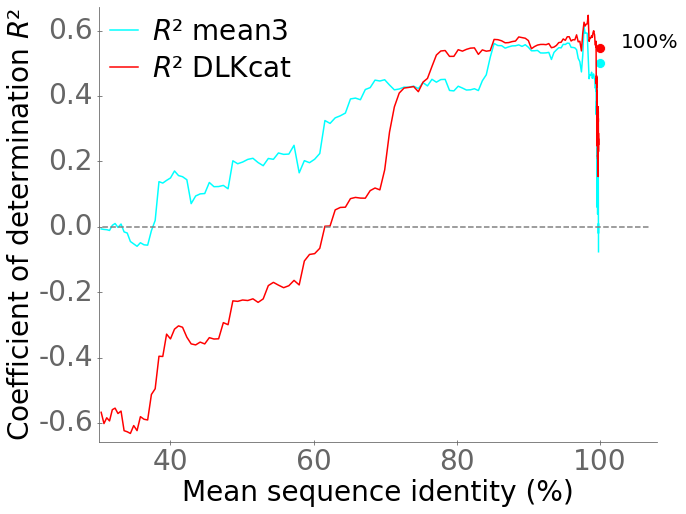

In [32]:
# Fig. 1:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})

R2_slide_long = pd.melt(R2_slide, id_vars="meanID")
sns.lineplot(x="meanID", y="value",  data=R2_slide_long.loc[R2_slide_long["variable"] == "R2.mean3"], color="cyan",
             label = "$\it{R²}$ mean3")
sns.lineplot(x="meanID", y="value", data=R2_slide_long.loc[R2_slide_long["variable"] == "R2.DLKcat"], color="red",
            label = "$\it{R²}$ DLKcat")
plt.xlabel("Mean sequence identity (%)")
plt.ylabel("Coefficient of determination $\it{R²}$")
plt.xlim(30, 108)
sns.scatterplot([100],[R2_mean3_100], color="cyan", s=100)
sns.scatterplot([100],[R2_DLKcat_100], color="red", s=100)
#sns.scatterplot(x=100, y=R2_mean3_100, color="cyan", size=2)
#sns.scatterplot(x=100, y=R2_DLKcat_100, color="red", size=2)
plt.annotate("100%", xy=(103, R2_DLKcat_100), size=20)
sns.lineplot(x=[0,107],y=[0,0], linestyle='--', color = "grey")
plt.show()

In [29]:
##################################################################
# analyze Li et al. Fig. 3c
##################################################################

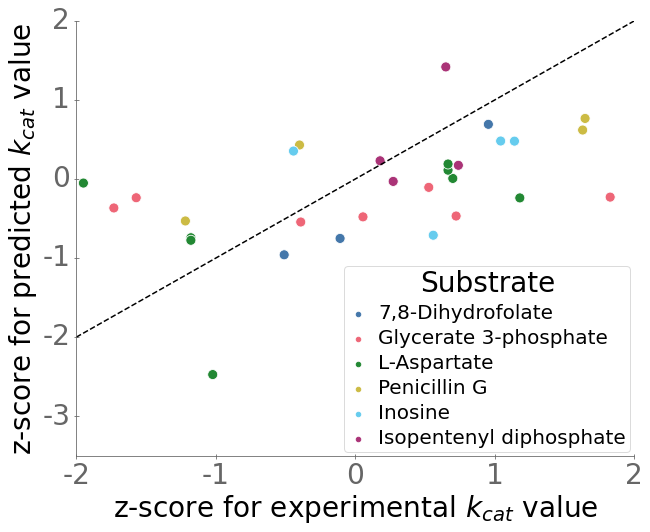

In [30]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})

df3c = pd.read_csv(join( "..", "data", "DLkcat", "figure_data", "figure3c_additional_information.csv"))
test_rows = df3c[df3c["split"] == "test"]
frac_test_data = len(test_rows) / len(df3c)  # 15.6% of the data was NOT used for training/validation!
df3c_s = df3c[["Substrate name", "Experimental value (log10 scale)", "Predicted value (log10 scale)", "split"]]

# z-scaling of mutant data (across all data, but separately for each family based on exp. values):
for s in df3c_s["Substrate name"].unique():
    idx = df3c_s["Substrate name"] == s
    xs = df3c_s[idx]
    mean_exp = xs["Experimental value (log10 scale)"].mean()
    sd_exp = xs["Experimental value (log10 scale)"].std()
    df3c_s.loc[idx, "experimental.zscaled"] = (df3c_s.loc[idx, "Experimental value (log10 scale)"] - mean_exp) / sd_exp
    df3c_s.loc[idx, "predicted.zscaled"] = (df3c_s.loc[idx, "Predicted value (log10 scale)"] - mean_exp) / sd_exp

# Figure 2
df3c_s_test = df3c_s[df3c_s["split"] == "test"]
sns.scatterplot(x="experimental.zscaled", y="predicted.zscaled", hue="Substrate name", data=df3c_s_test, s= 100)
plt.xlabel("z-score for experimental $\it{k}_{cat}$ value")
plt.ylabel("z-score for predicted $\it{k}_{cat}$ value")

sns.lineplot(x=[-2,2],y=[-2,2], linestyle='--', color = "black")
#plt.legend(title="Substrate", bbox_to_anchor=(1, 0.5), frameon = True, fontsize=20)
plt.legend(title="Substrate", loc = 'lower right', frameon = True, fontsize=20)
plt.xlim(-2, 2)
plt.ylim(-3.5, 2)
plt.show()

In [31]:
r, _ = pearsonr(df3c_s_test["experimental.zscaled"], df3c_s_test["predicted.zscaled"])
print(f"r={r:.3f} for z-scaled test data")


r2 = r2_score(df3c_s_test["experimental.zscaled"], df3c_s_test["predicted.zscaled"])
print(f"R2={r2:.3f} for z-scaled test data")

r=0.498 for z-scaled test data
R2=0.162 for z-scaled test data
